In [1]:
import pandas as pd
import numpy as np

In [60]:
from sklearn.metrics import confusion_matrix

def plot(y_val, y_pred):
    labels = unique_labels(y_train)
    column = [f'Predicccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


In [35]:
from sklearn.metrics import accuracy_score, classification_report

def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [36]:
from sklearn.metrics import confusion_matrix

def pfq(y_true, y_pred, calidades):
    conf_matrix = confusion_matrix(y_true, y_pred)
    for calidad in calidades:
        indice = calidad - min(calidades)  # Índice en la matriz de confusión
        tp = conf_matrix[indice, indice]  # Verdaderos positivos para la calidad en particular
        fp = conf_matrix[:, indice].sum() - tp  # Falsos positivos
        fn = conf_matrix[indice, :].sum() - tp  # Falsos negativos
        precision = tp / (tp + fp + 1e-12)  # Calcular precisión
        print(f'Precisión para calidad {calidad}: {precision:.4f}')

In [2]:
datos=pd.read_csv("wheat.csv")

In [3]:
datos

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


<Axes: title={'center': 'datos'}, xlabel='category'>

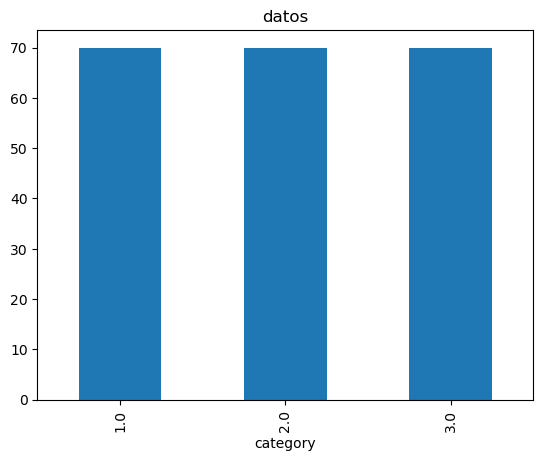

In [4]:
datos["category"].value_counts().plot(kind='bar', title='datos')

#### ELIMINAR LINEAL DEPENDIENTES

In [5]:
eliminar=['area','length','width']

In [6]:
datos=datos.drop(eliminar,axis=1)

In [7]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


In [8]:
cor=datos.corr()

In [9]:
cor

,perimeter,compactness,asymmetry coefficient,groove length,category
perimeter,1.000000,0.529244,-0.217340,0.890784,-0.327900
compactness,0.529244,1.000000,-0.331471,0.226825,-0.531007
asymmetry coefficient,-0.217340,-0.331471,1.000000,-0.011079,0.577273
groove length,0.890784,0.226825,-0.011079,1.000000,0.024301
category,-0.327900,-0.531007,0.577273,0.024301,1.000000


### NORMALIZACION(PENDIENTE)

In [10]:
from sklearn.preprocessing import normalize

normalized_data = normalize(datos, axis=0)
datosN = pd.DataFrame(normalized_data, columns=datos.columns)
datosN = datosN.iloc[:, :-1]

In [11]:
datosN

,perimeter,compactness,asymmetry coefficient,groove length
0,0.070057,0.068981,0.038386,0.066335
1,0.068782,0.069781,0.017594,0.062980
2,0.066516,0.071674,0.046648,0.061315
3,0.065808,0.070922,0.039043,0.061061
4,0.070765,0.071547,0.023419,0.065763
...,...,...,...,...
205,0.062315,0.069560,0.062756,0.061887
206,0.060804,0.067405,0.074750,0.063577
207,0.064487,0.070352,0.143711,0.064251
208,0.062362,0.067485,0.062185,0.064098


In [12]:
X = datosN
Y = datos['category']


In [13]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
205    3.0
206    3.0
207    3.0
208    3.0
209    3.0
Name: category, Length: 210, dtype: float64

### DIVISION DATOS 80/20

In [30]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.3, random_state=42)

# RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
r_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_val)

### MATRIZ CONFUSION 1

<Axes: >

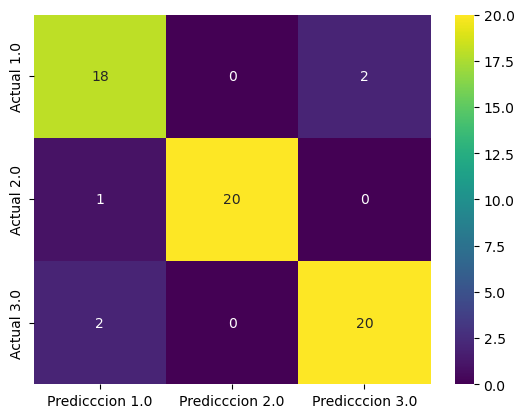

In [61]:
plot(y_val,y_pred)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred)
calidades = [1,2,3]
for calidad in calidades:
    indice = calidad-1  
    # Verdaderos positivos para la calidad en particular
    tp = conf_matrix[indice, indice]
    # Falsos positivos
    fp = conf_matrix[:, indice].sum() - tp
    # Falsos negativos
    fn = conf_matrix[indice, :].sum() - tp
    # Calcular precisión
    precision = tp / (tp + fp + 1e-12)
    print(f'Precisión para clase {calidad}: {precision:.4f}')

Precisión para clase 1: 0.8571
Precisión para clase 2: 1.0000
Precisión para clase 3: 0.9091


In [20]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9047619047619048
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.77      0.91      0.83        11
         2.0       1.00      1.00      1.00        14
         3.0       0.93      0.82      0.87        17

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



# K-MEANS

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)


<Axes: >

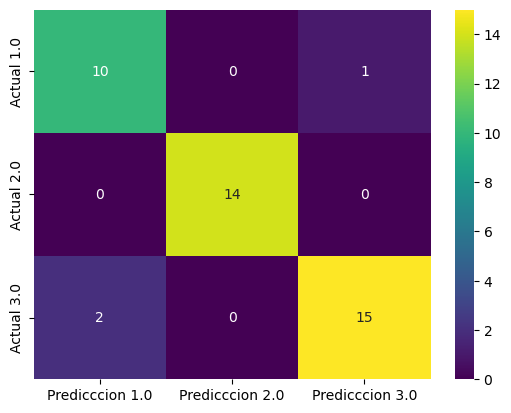

In [29]:
plot(y_val,y_pred2)

In [23]:
accuracy = accuracy_score(y_val, y_pred2)
classification_rep = classification_report(y_val, y_pred2, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.9285714285714286
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.83      0.91      0.87        11
         2.0       1.00      1.00      1.00        14
         3.0       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [38]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# Arboles de decision

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

<Axes: >

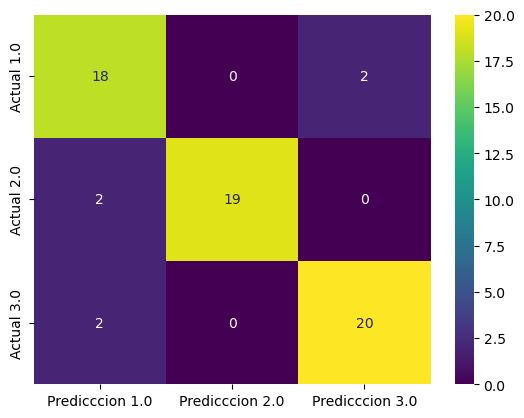

In [40]:
plot(y_val,y_pred3)

In [41]:
resultadosModelo(y_val, y_pred3)

Precisión: 0.9047619047619048
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.82      0.90      0.86        20
         2.0       1.00      0.90      0.95        21
         3.0       0.91      0.91      0.91        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.91      0.90      0.91        63



In [42]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# SVM

In [50]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=0.01)
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

<Axes: >

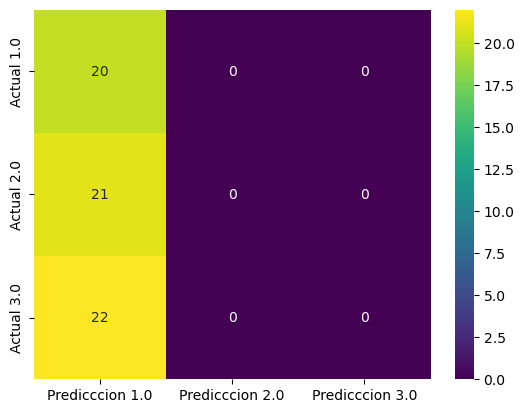

In [55]:
plot(y_val,y_pred4)

In [64]:
resultadosModelo(y_val, y_pred4)

Precisión: 0.31746031746031744
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.32      1.00      0.48        20
         2.0       1.00      0.00      0.00        21
         3.0       1.00      0.00      0.00        22

    accuracy                           0.32        63
   macro avg       0.77      0.33      0.16        63
weighted avg       0.78      0.32      0.15        63



In [66]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# MLP

In [62]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10000)
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_val)

<Axes: >

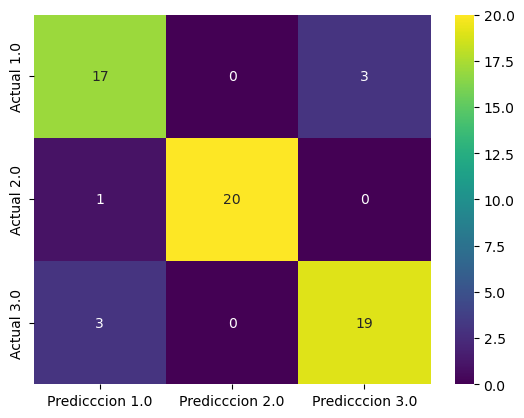

In [63]:
plot(y_val,y_pred5)

In [67]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.8888888888888888
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.81      0.85      0.83        20
         2.0       1.00      0.95      0.98        21
         3.0       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



In [68]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091
